<a href="https://colab.research.google.com/github/yivancha/Python-for-Data-Analytics/blob/main/Portfolio_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade google-cloud-bigquery

from google.colab import auth
from google.cloud import bigquery

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from scipy import stats


# Аутентифікація
auth.authenticate_user()

# Створення клієнта для BigQuery
client = bigquery.Client(project="data-analytics-mate")

# SQL-запит
query = """
SELECT
    s.date AS order_date,
    s.ga_session_id,
    sp.continent,
    sp.country,
    sp.device,
    sp.browser,
    sp.mobile_model_name,
    sp.operating_system,
    sp.language,
    sp.medium AS traffic_source,
    sp.channel AS traffic_channel,
    acc.id AS user_id,
    CASE WHEN acc.is_verified = 1 THEN 'YES' ELSE 'NO' END AS is_email_verified,
    CASE WHEN acc.is_unsubscribed = 1 THEN 'NO' ELSE 'YES' END AS is_subscribed,
    prd.category,
    prd.name AS product_name,
    prd.price,
    prd.short_description
FROM `data-analytics-mate.DA.session` s
LEFT JOIN `data-analytics-mate.DA.session_params` sp
ON s.ga_session_id = sp.ga_session_id
LEFT JOIN `data-analytics-mate.DA.order` ord
ON s.ga_session_id = ord.ga_session_id
LEFT JOIN `data-analytics-mate.DA.product` prd
ON ord.item_id = prd.item_id
LEFT JOIN `data-analytics-mate.DA.account_session` acs
ON s.ga_session_id = acs.ga_session_id
LEFT JOIN `data-analytics-mate.DA.account` acc
ON acs.account_id = acc.id;
"""

# Виконання запиту
query_job = client.query(query)  # Виконання SQL-запиту
results = query_job.result()  # Очікування завершення запиту

# Перетворення результатів на DataFrame
df = results.to_dataframe()

# Виведення результату
df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.9/247.9 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-bigquery
    Found existing installation: google-cloud-bigquery 3.29.0
    Uninstalling google-cloud-bigquery-3.29.0:
      Successfully uninstalled google-cloud-bigquery-3.29.0


,order_date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,traffic_source,traffic_channel,user_id,is_email_verified,is_subscribed,category,product_name,price,short_description
0,2020-11-01,5760483956,Americas,United States,desktop,Chrome,Safari,Macintosh,zh,<Other>,Paid Search,<NA>,NO,YES,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
1,2020-11-01,7115337200,Europe,United Kingdom,desktop,Chrome,Chrome,Web,en-us,organic,Organic Search,<NA>,NO,YES,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
2,2020-11-01,3978035233,Europe,Norway,mobile,Chrome,<Other>,Web,zh,(none),Direct,<NA>,NO,YES,Tables & desks,RÅSKOG,189.0,"Trolley, 35x45x78 cm"
3,2020-11-01,9648986282,Africa,Nigeria,mobile,Chrome,<Other>,Android,es-es,(none),Direct,<NA>,NO,YES,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"
4,2020-11-01,4393441533,Asia,China,desktop,Chrome,Chrome,Windows,en-us,(none),Direct,<NA>,NO,YES,Bookcases & shelving units,VITTSJÖ,609.0,"Shelving unit with laptop table, 202x36x175 cm"


***Опис отриманого датасету (Dataset Description)***

---



In [ ]:
# Загальна кількість колонок в датасеті
total_columns = df.shape[1]
print(f"Загальна кількість колонок: {total_columns}")

df.info()
print(df.dtypes)

Загальна кількість колонок: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   order_date         349545 non-null  dbdate 
 1   ga_session_id      349545 non-null  Int64  
 2   continent          349545 non-null  object 
 3   country            349545 non-null  object 
 4   device             349545 non-null  object 
 5   browser            349545 non-null  object 
 6   mobile_model_name  349545 non-null  object 
 7   operating_system   349545 non-null  object 
 8   language           235279 non-null  object 
 9   traffic_source     349545 non-null  object 
 10  traffic_channel    349545 non-null  object 
 11  user_id            27945 non-null   Int64  
 12  is_email_verified  349545 non-null  object 
 13  is_subscribed      349545 non-null  object 
 14  category           33538 non-null   object 
 15  product_name       3

In [ ]:
# Кількість колонок числового типу
numeric_columns = df.select_dtypes(include=['number']).columns
print(f"Кількість числових колонок: {len(numeric_columns)}")
print("Числові колонки:", list(numeric_columns))

Кількість числових колонок: 3
Числові колонки: ['ga_session_id', 'user_id', 'price']


In [ ]:
# Кількість колонок категоріального типу
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(f"Кількість категоріальних колонок: {len(categorical_columns)}")
print("Категоріальні колонки:", list(categorical_columns))

Кількість категоріальних колонок: 14
Категоріальні колонки: ['continent', 'country', 'device', 'browser', 'mobile_model_name', 'operating_system', 'language', 'traffic_source', 'traffic_channel', 'is_email_verified', 'is_subscribed', 'category', 'product_name', 'short_description']


In [ ]:
# Кількість колонок типу datetime
df['order_date'] = pd.to_datetime(df['order_date'])
print(df.dtypes['order_date'])

datetime_columns = df.select_dtypes(include=['datetime']).columns
print(f"Кількість колонок типу datetime: {len(datetime_columns)}")
print("Datetime колонки:", list(datetime_columns))

datetime64[ns]
Кількість колонок типу datetime: 1
Datetime колонки: ['order_date']


In [ ]:
# Кількість унікальних сесій
unique_sessions = df['ga_session_id'].nunique()
print(f"Кількість унікальних сесій: {unique_sessions}")

Кількість унікальних сесій: 349545


In [ ]:
# Період часу, який розглядається (від… до…)
min_date = df['order_date'].min()
max_date = df['order_date'].max()
print(f"Період часу: від {min_date} до {max_date}")

Період часу: від 2020-11-01 00:00:00 до 2021-01-31 00:00:00


In [ ]:
# Перевірка наявності пропущених значень
missing_values = df.isnull().sum()
total_missing = missing_values.sum()
print(f"Загальна кількість пропущених значень: {total_missing}")
print("Кількість пропущених значень у кожній колонці:")
print(missing_values[missing_values > 0])

Загальна кількість пропущених значень: 1699894
Кількість пропущених значень у кожній колонці:
language             114266
user_id              321600
category             316007
product_name         316007
price                316007
short_description    316007
dtype: int64


In [ ]:
# Колонки з найбільшою кількістю пропущених значень та можливі причини наявності пропусків
missing_sorted = missing_values[missing_values > 0].sort_values(ascending=False)
print("Колонки з найбільшою кількістю пропущених значень:")
print(missing_sorted)

Колонки з найбільшою кількістю пропущених значень:
user_id              321600
category             316007
product_name         316007
price                316007
short_description    316007
language             114266
dtype: int64


Можливі причини наявності пропусків:
- дані могли бути відсутні при зборі (наприклад, необов’язкові поля);
- проблеми з обробкою даних або їх агрегуванням;
- відсутні значення через технічні причини.

In [ ]:
# Континенти(топ-3) та країни(топ-5), де компанія має найбільші продажі та найбільшу кількість замовлень
top_continents_sales = df.groupby('continent')['price'].sum().nlargest(3)
top_continents_orders = df.groupby('continent')['ga_session_id'].nunique().nlargest(3)

top_countries_sales = df.groupby('country')['price'].sum().nlargest(5)
top_countries_orders = df.groupby('country')['ga_session_id'].nunique().nlargest(5)

print("Топ-3 континенти за продажами:\n", top_continents_sales)
print("\nТоп-3 континенти за кількістю замовлень:\n", top_continents_orders)
print("\nТоп-5 країн за продажами:\n", top_countries_sales)
print("\nТоп-5 країн за кількістю замовлень:\n", top_countries_orders)

Топ-3 континенти за продажами:
 continent
Americas    17665280.0
Asia         7601298.3
Europe       5934624.2
Name: price, dtype: float64

Топ-3 континенти за кількістю замовлень:
 continent
Americas    193179
Asia         83113
Europe       65135
Name: ga_session_id, dtype: int64

Топ-5 країн за продажами:
 country
United States     13943553.9
India              2809762.0
Canada             2437921.0
United Kingdom      938317.9
France              710692.8
Name: price, dtype: float64

Топ-5 країн за кількістю замовлень:
 country
United States     153470
India              32763
Canada             25994
United Kingdom     11003
France              6958
Name: ga_session_id, dtype: int64


In [ ]:
# Топ-10 категорій товарів за загальною сумою продажів
top_categories = df.groupby('category')['price'].sum().nlargest(10)
print("Топ-10 категорій товарів за загальною сумою продажів:\n", top_categories)

Топ-10 категорій товарів за загальною сумою продажів:
 category
Sofas & armchairs                   8388254.5
Chairs                              6147748.8
Beds                                4919725.0
Bookcases & shelving units          3640818.1
Cabinets & cupboards                2336499.5
Outdoor furniture                   2142222.2
Tables & desks                      1790307.5
Chests of drawers & drawer units     906562.5
Bar furniture                        735503.0
Children's furniture                 467697.0
Name: price, dtype: float64


In [ ]:
# Топ-10 категорій товарів у країні з найбільшими продажами

# Країна з найбільшими продажами
top_country = df.groupby('country')['price'].sum().idxmax()

top_categories_in_top_country = df[df['country'] == top_country].groupby('category')['price'].sum().nlargest(10)
print(f"Топ-10 категорій у країні {top_country}:\n", top_categories_in_top_country)

Топ-10 категорій у країні United States:
 category
Sofas & armchairs                   3707144.5
Chairs                              2619773.8
Beds                                2213058.0
Bookcases & shelving units          1567606.9
Cabinets & cupboards                 994545.5
Outdoor furniture                    929245.2
Tables & desks                       777865.0
Chests of drawers & drawer units     382388.0
Bar furniture                        330805.0
Children's furniture                 207575.0
Name: price, dtype: float64


Порівнюючи список топ-10 категорій товарів у країні з найбільшими продажами, якою є США, із загальним списком (top_categories), можна побачити, що відмінностей немає.

In [ ]:
# Аналіз продажів у розрізі типів та моделей девайсів (% від загальних продажів)
device_sales = df.groupby('device')['price'].sum()
device_sales_percent = (device_sales / device_sales.sum()) * 100
print("Продажі за типами девайсів (% від загальних):\n", device_sales_percent)

model_sales = df.groupby('mobile_model_name')['price'].sum()
model_sales_percent = (model_sales / model_sales.sum()) * 100
print("Продажі за моделями девайсів (% від загальних):\n", model_sales_percent)

Продажі за типами девайсів (% від загальних):
 device
desktop    59.002245
mobile     38.734924
tablet      2.262831
Name: price, dtype: float64
Продажі за моделями девайсів (% від загальних):
 mobile_model_name
<Other>       20.440966
Chrome        27.835602
ChromeBook     5.725241
Edge           2.180746
Firefox        1.316998
Pixel 3        0.341390
Pixel 4 XL     0.369976
Safari        20.302504
iPad           1.403910
iPhone        20.082667
Name: price, dtype: float64


In [ ]:
# Аналіз продажів у розрізі браузерів та операційних систем (% від загальних продажів)
browser_sales = df.groupby('browser')['price'].sum()
browser_sales_percent = (browser_sales / browser_sales.sum()) * 100

os_sales = df.groupby('operating_system')['price'].sum()
os_sales_percent = (os_sales / os_sales.sum()) * 100

print("Продажі за браузерами (% від загальних):\n", browser_sales_percent)
print("Продажі за операційними системами (% від загальних):\n", os_sales_percent)

Продажі за браузерами (% від загальних):
 browser
<Other>             2.888035
Android Webview     1.285556
Chrome             68.269215
Edge                2.240868
Firefox             1.775079
Safari             23.541246
Name: price, dtype: float64
Продажі за операційними системами (% від загальних):
 operating_system
<Other>       2.572760
Android       8.726412
Macintosh     7.834944
Web          57.694419
Windows      11.901104
iOS          11.270361
Name: price, dtype: float64


In [ ]:
# Аналіз продажів за джерелами трафіку (% від загальних продажів)
traffic_sales = df.groupby('traffic_source')['price'].sum()
traffic_sales_percent = (traffic_sales / traffic_sales.sum()) * 100

print("Продажі за джерелами трафіку (% від загальних):\n", traffic_sales_percent)

Продажі за джерелами трафіку (% від загальних):
 traffic_source
(data deleted)     6.386645
(none)            23.442345
<Other>           14.047882
cpc                4.273902
organic           34.202840
referral          17.646386
Name: price, dtype: float64


In [ ]:
# Відсоток зареєстрованих користувачів, які підтвердили свою електронну адресу
confirmed_percent = (df['is_email_verified'].eq('YES').sum() / df['user_id'].nunique()) * 100

print(f"Відсоток користувачів, які підтвердили свій email: {confirmed_percent:.2f}%")

Відсоток користувачів, які підтвердили свій email: 71.70%


In [ ]:
# Відсоток зареєстрованих користувачів, які відписалися від розсилки
unsubscribed_percent = (df['is_subscribed'].eq('NO').sum() / df['user_id'].nunique()) * 100

print(f"Відсоток користувачів, які відписалися від розсилки: {unsubscribed_percent:.2f}%")

Відсоток користувачів, які відписалися від розсилки: 16.94%


In [ ]:
# Поведінка користувачів, відписаних від розсилки vs досі підписаних (обсяг продажів)
sales_unsubscribed = df[df['is_subscribed'] == 'NO']['price'].sum()
sales_subscribed = df[df['is_subscribed'] == 'YES']['price'].sum()

print(f"Продажі серед відписаних: {sales_unsubscribed}")
print(f"Продажі серед підписаних: {sales_subscribed}")


Продажі серед відписаних: 431721.6
Продажі серед підписаних: 31540009.499999996


In [ ]:
# Континенти(топ-3) та країни(топ-5) з найбільшою кількістю зареєстрованих користувачів
top_continents_users = df.groupby('continent')['user_id'].nunique().nlargest(3)
top_countries_users = df.groupby('country')['user_id'].nunique().nlargest(5)

print("Топ-3 континенти з найбільшою кількістю зареєстрованих користувачів:\n", top_continents_users)
print("Топ-5 країн з найбільшою кількістю зареєстрованих користувачів:\n", top_countries_users)

Топ-3 континенти з найбільшою кількістю зареєстрованих користувачів:
 continent
Americas    15520
Asia         6664
Europe       5170
Name: user_id, dtype: int64
Топ-5 країн з найбільшою кількістю зареєстрованих користувачів:
 country
United States     12384
India              2687
Canada             2067
United Kingdom      859
France              553
Name: user_id, dtype: int64


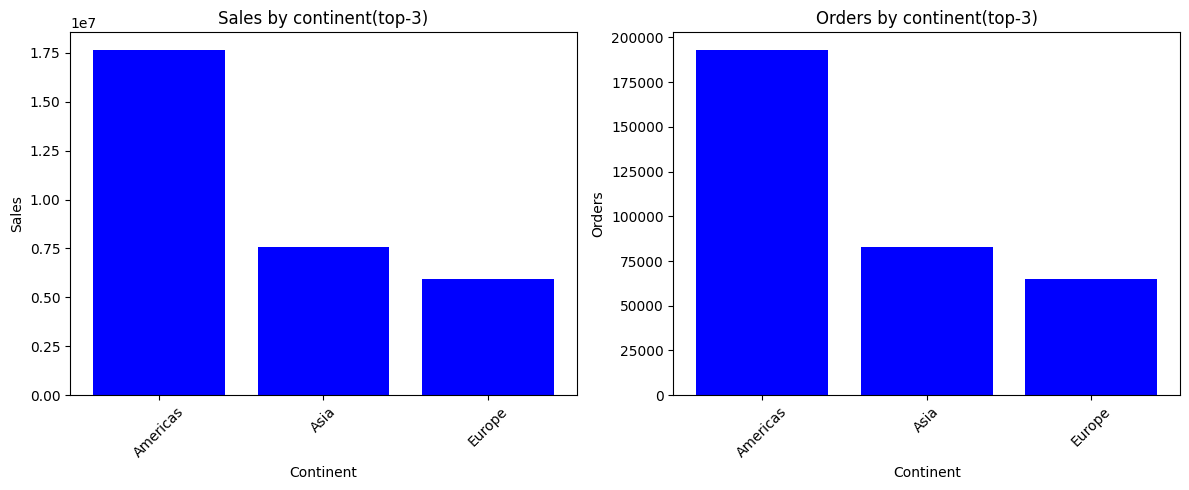

In [ ]:
# Візуалізація топ-3 континентів, де компанія має найбільші продажі та найбільшу кількість замовлень

plt.figure(figsize=(12, 5))

# Sales
plt.subplot(1, 2, 1)
plt.bar(top_continents_sales.index, top_continents_sales.values, color="blue")
plt.xlabel("Continent")
plt.ylabel("Sales")
plt.title("Sales by continent(top-3)")
plt.xticks(rotation=45)

# Orders
plt.subplot(1, 2, 2)
plt.bar(top_continents_orders.index, top_continents_orders.values, color="blue")
plt.xlabel("Continent")
plt.ylabel("Orders")
plt.title("Orders by continent(top-3)")
plt.xticks(rotation=45)

plt.tight_layout()


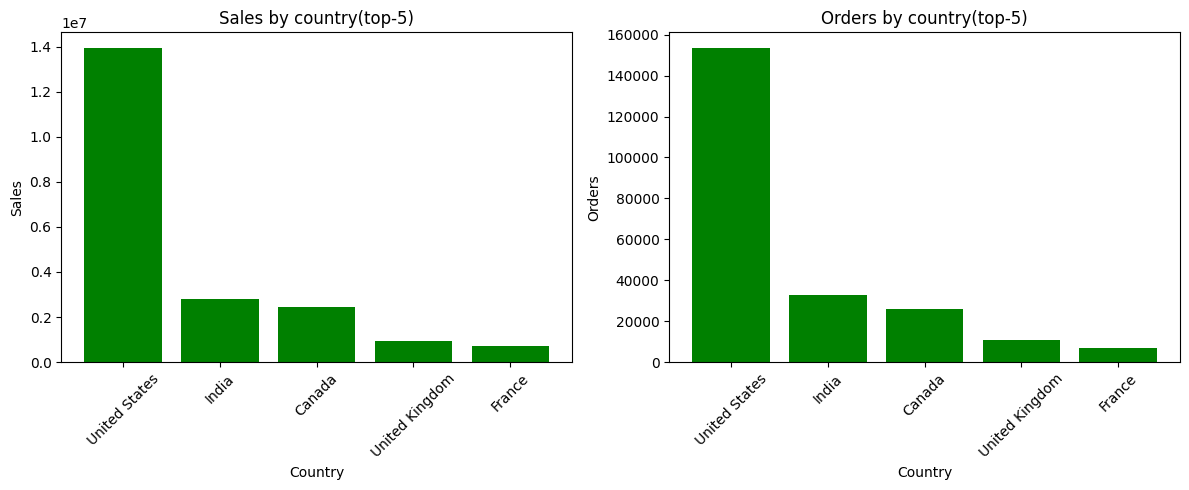

In [ ]:
# Візуалізація топ-5 країн, де компанія має найбільші продажі та найбільшу кількість замовлень

plt.figure(figsize=(12, 5))

# Sales
plt.subplot(1, 2, 1)
plt.bar(top_countries_sales.index, top_countries_sales.values, color="green")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.title("Sales by country(top-5)")
plt.xticks(rotation=45)

# Orders
plt.subplot(1, 2, 2)
plt.bar(top_countries_orders.index, top_countries_orders.values, color="green")
plt.xlabel("Country")
plt.ylabel("Orders")
plt.title("Orders by country(top-5)")
plt.xticks(rotation=45)

plt.tight_layout()

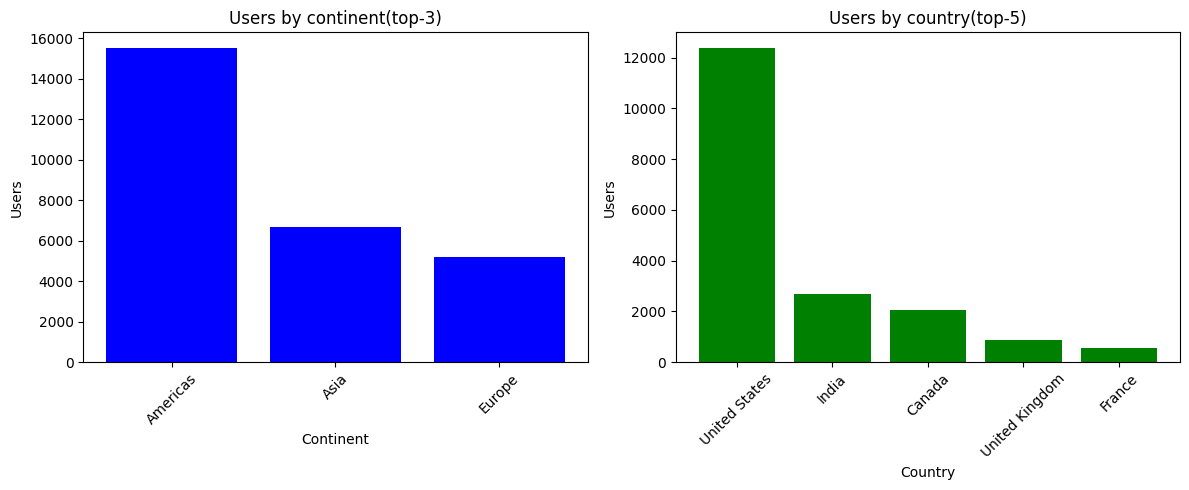

In [ ]:
# Візуалізація топ-3 континентів та топ-5 країн з найбільшою кількістю зареєстрованих користувачів

plt.figure(figsize=(12, 5))

# Continent
plt.subplot(1, 2, 1)
plt.bar(top_continents_users.index, top_continents_users.values, color="blue")
plt.xlabel("Continent")
plt.ylabel("Users")
plt.title("Users by continent(top-3)")
plt.xticks(rotation=45)

# Country
plt.subplot(1, 2, 2)
plt.bar(top_countries_users.index, top_countries_users.values, color="green")
plt.xlabel("Country")
plt.ylabel("Users")
plt.title("Users by country(top-5)")
plt.xticks(rotation=45)

plt.tight_layout()


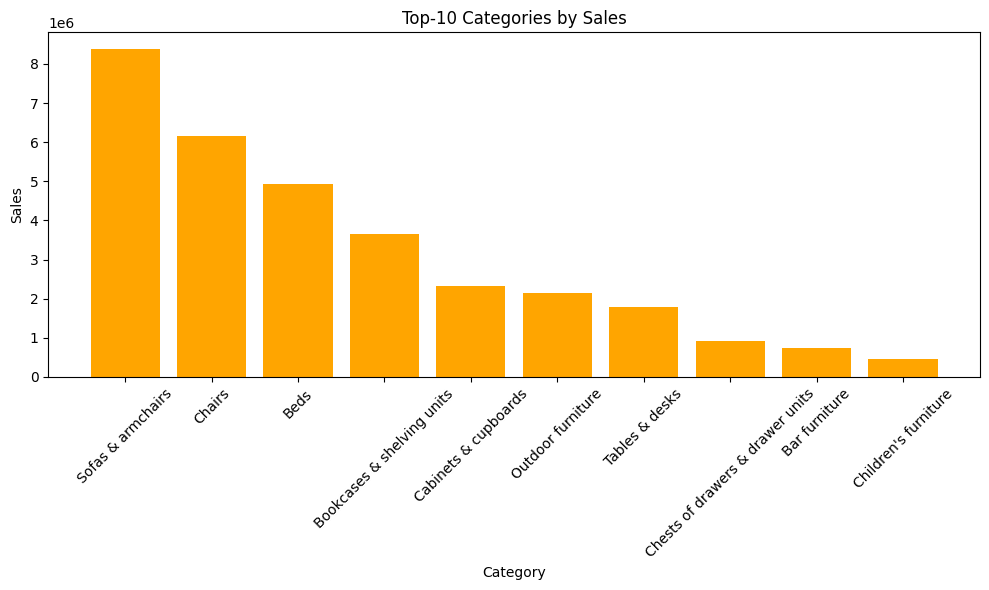

In [ ]:
# Візуалізація топ-10 категорій товарів за загальною сумою продажів

plt.figure(figsize=(10, 6))

plt.bar(top_categories.index, top_categories.values, color="orange")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.title("Top-10 Categories by Sales")
plt.xticks(rotation=45)
plt.tight_layout()

***Аналіз динаміки продажів (Sales Dynamics Analysis)***

---



order_date
2020-11-01    244292.5
2020-11-02    355506.8
2020-11-03    498979.6
2020-11-04    339187.1
2020-11-05    391276.6
Name: price, dtype: float64


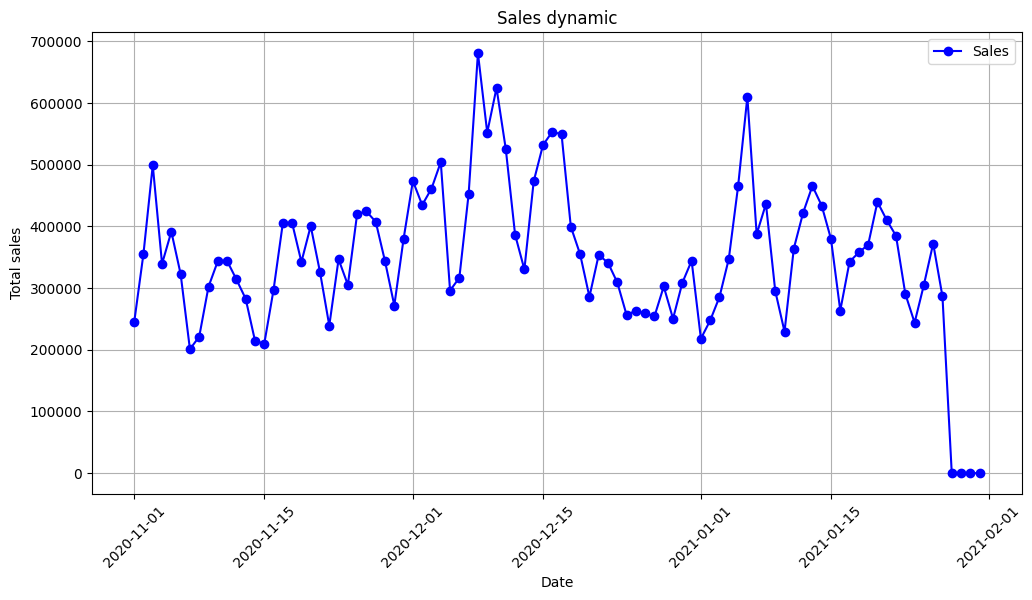

In [ ]:
# Візуалізація загальної динаміки продажів

# Групуємо продажі за датою
daily_sales = df.groupby('order_date')['price'].sum()
print(daily_sales.head())

plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b', label='Sales')

plt.xlabel('Date')
plt.ylabel('Total sales')
plt.title('Sales dynamic')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

З графіка, який показує загальну динаміку продажів, видно, що спостерігається певна сезонність. Помітно кілька чітких піків продажів, особливо в середині грудня 2020 року та на початку січня 2021 року. Це може свідчити про збільшення попиту в святковий період та акційні пропозиції. Після піків спостерігаються різкі падіння продажів. Це може бути пов'язано із закінченням святкового сезону або іншими факторами.

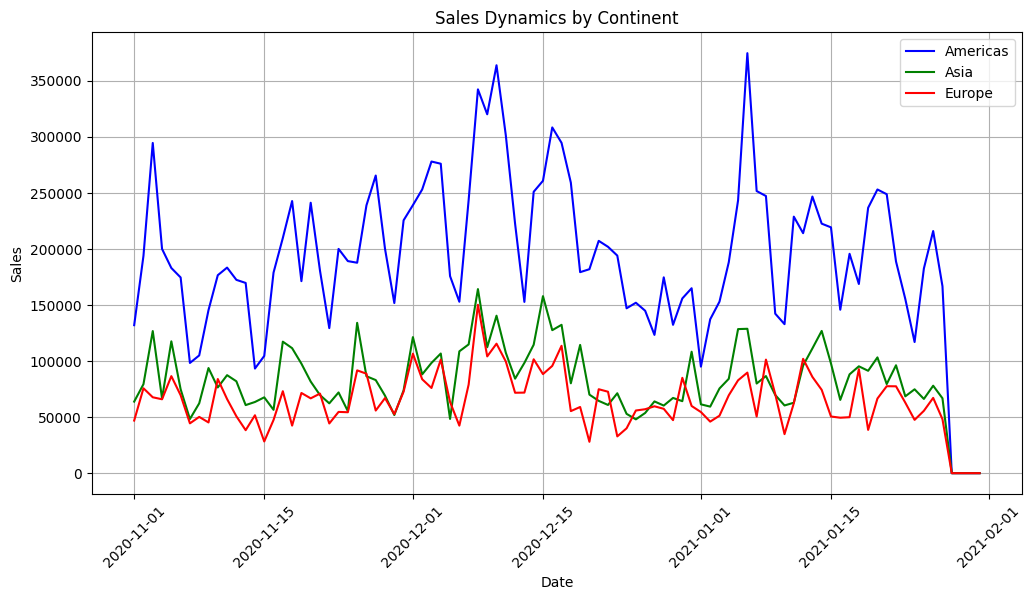

In [ ]:
# Аналіз динаміки продажів в Америці, Азії та Європі

sales_by_continent = df.groupby(['order_date', 'continent'])['price'].sum().unstack()


plt.figure(figsize=(12, 6))
plt.plot(sales_by_continent.index, sales_by_continent['Americas'], label='Americas', color='blue')
plt.plot(sales_by_continent.index, sales_by_continent['Asia'], label='Asia', color='green')
plt.plot(sales_by_continent.index, sales_by_continent['Europe'], label='Europe', color='red')

plt.title("Sales Dynamics by Continent")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title='Continent')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

plt.show()

Графік показує динаміку продажів у розрізі континентів, а саме: Америка, Європа та Азія. Протягом всього періоду продажі в Америці значно вищі, ніж в Європі та Азії. Це свідчить про те, що Америка - ключовий ринок для цього бізнесу. Продажі в Азії та Європі мають схожі тенденції, хоча в Азії трохи вищі.
Для всіх троьх континентів характерні значні коливання. Це може бути пов'язано з різними факторами, такими як сезонність, маркетингові кампанії або економічні умови.

In [ ]:
# Аналіз динаміки продажів у розрізі каналів трафіку

# Наявні канали трафіку
df['traffic_channel'].unique()

array(['Paid Search', 'Organic Search', 'Direct', 'Undefined',
       'Social Search'], dtype=object)

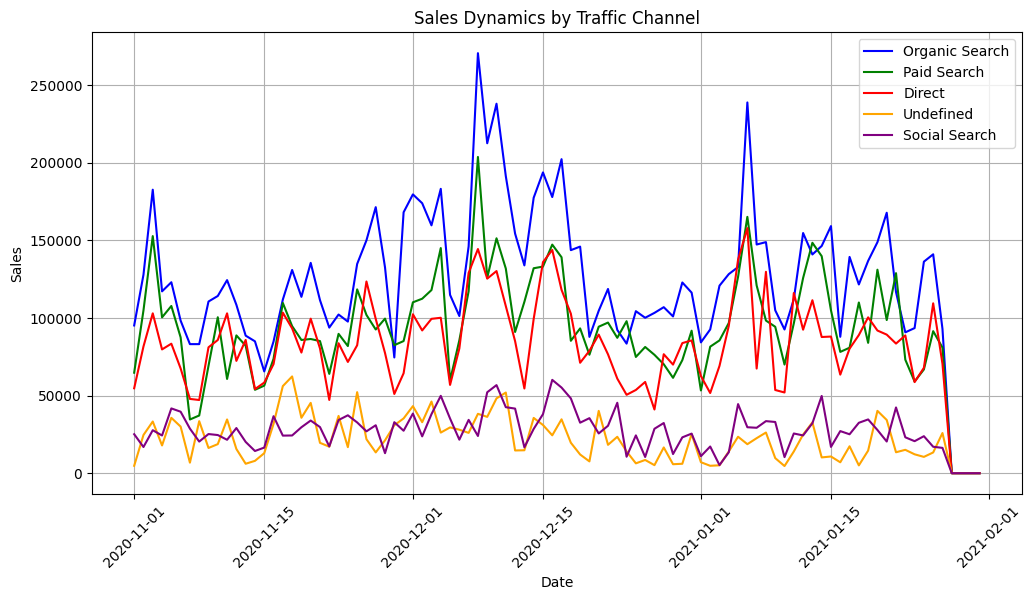

In [ ]:
sales_by_traffic_channel = df.groupby(['order_date', 'traffic_channel'])['price'].sum().unstack()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_traffic_channel.index, sales_by_traffic_channel['Organic Search'], label='Organic Search', color='blue')
plt.plot(sales_by_traffic_channel.index, sales_by_traffic_channel['Paid Search'], label='Paid Search', color='green')
plt.plot(sales_by_traffic_channel.index, sales_by_traffic_channel['Direct'], label='Direct', color='red')
plt.plot(sales_by_traffic_channel.index, sales_by_traffic_channel['Undefined'], label='Undefined', color='orange')
plt.plot(sales_by_traffic_channel.index, sales_by_traffic_channel['Social Search'], label='Social Search', color='purple')

plt.title("Sales Dynamics by Traffic Channel")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title='Traffic Channel')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

plt.show()

Графік показує динаміку продажів у розрізі каналів трафіку. Канали "Organic Search" та "Paid Search" - основні канали, що приносять продажі, вони показують найвищі показники протягом всього періоду. Канал "Direct" є також важливим, але його показники поступаються двом попереднім. Канали "Undefined" і "Social Search" - аутсайдери за показниками продажів у розрізі каналів трафіку. Всі канали трафіку демонструють значні коливання продажів, що свідчить про вплив зовнішніх факторів або сезонності.

In [ ]:
# Аналіз динаміки продажів у розрізі типів девайсів

# Типи девайсів, які використовуються користувачами
df['device'].unique()

array(['desktop', 'mobile', 'tablet'], dtype=object)

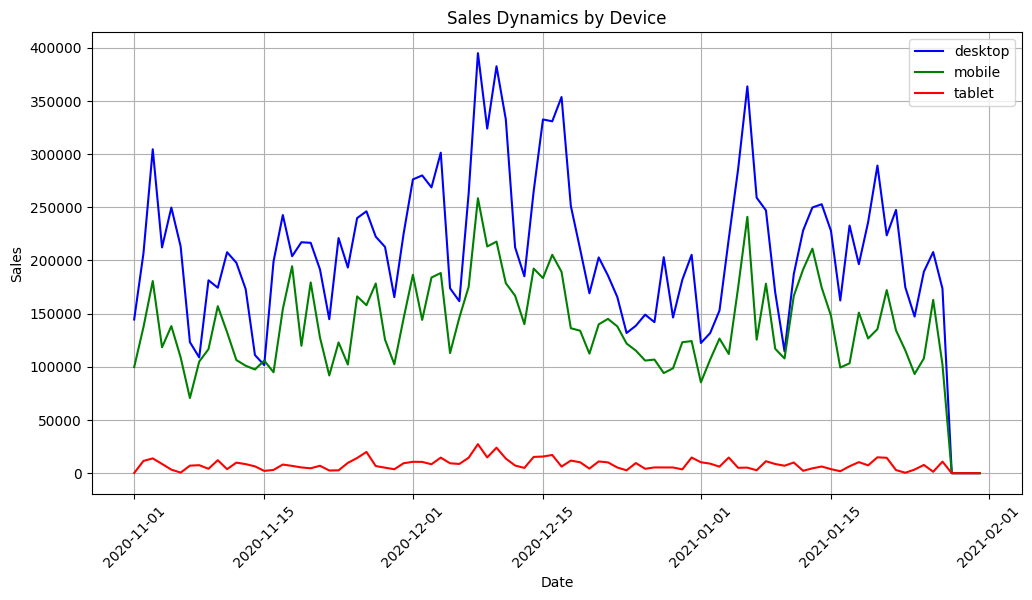

In [ ]:
sales_by_device = df.groupby(['order_date', 'device'])['price'].sum().unstack()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_device.index, sales_by_device['desktop'], label='desktop', color='blue')
plt.plot(sales_by_device.index,sales_by_device['mobile'], label='mobile', color='green')
plt.plot(sales_by_device.index, sales_by_device['tablet'], label='tablet', color='red')

plt.title("Sales Dynamics by Device")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title='Device')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

plt.show()

Графік показує динаміку продажів у розрізі типів девайсів. Продажі з десктопів (desktop) значно перевищують продажі з мобільних пристроїв (mobile) та планшетів (tablet). Це свідчить про те, що більшість покупок здійснюється з комп'ютера. Продажі з мобільних пристроїв більш стабільні, але значно нижчі. Продажі з планшетів дуже низькі і практично не змінюються протягом періоду. Продажі з десктопу (в більшій мірі) та з мобільних пристроїв демонструють значні коливання. Це може бути повязано, як і в попередніх висновках, з різними факторами, а саме: сезонність, маркетингові кампанії або економічні умови.

***Зведені таблиці (Pivot Tables)***

---



In [ ]:
# Зведена таблиця, яка показує кількість сесій у розрізі каналів трафіку та типів девайсів

# Видаляємо рядки, де 'traffic_channel' або 'device' є NaN
df_cleaned = df.dropna(subset=["traffic_channel", "device"])

pivot_table = pd.pivot_table(df_cleaned, values="ga_session_id", index=["traffic_channel", "device"], aggfunc="count")
print(pivot_table)

                         ga_session_id
traffic_channel device                
Direct          desktop          47825
                mobile           31745
                tablet            1812
Organic Search  desktop          72622
                mobile           49014
                tablet            2789
Paid Search     desktop          55167
                mobile           37034
                tablet            2140
Social Search   desktop          16288
                mobile           10988
                tablet             638
Undefined       desktop          12527
                mobile            8486
                tablet             470


In [ ]:
# Зведена таблиця, яка показує загальні продажі за категоріями товарів (топ-10 категорій) у різних країнах (топ-5 країн)

# Загальний обсяг продажів за категоріями
top_categories = df.groupby("category")["price"].sum().nlargest(10).index

# Фільтруємо дані тільки для топ-10 категорій
df_filtered = df[df["category"].isin(top_categories)]

# Обчислюємо загальний обсяг продажів за країнами
top_countries = df_filtered.groupby("country")["price"].sum().nlargest(5).index

# Фільтруємо дані тільки для топ-5 країн
df_filtered = df_filtered[df_filtered["country"].isin(top_countries)]

pivot_table = pd.pivot_table(df_filtered, values="price", index=["country", "category"], aggfunc="sum")
print(pivot_table)

                                                     price
country        category                                   
Canada         Bar furniture                       51724.0
               Beds                               354772.0
               Bookcases & shelving units         278981.9
               Cabinets & cupboards               181802.0
               Chairs                             417740.8
               Chests of drawers & drawer units    71952.0
               Children's furniture                30264.0
               Outdoor furniture                  185322.8
               Sofas & armchairs                  692427.5
               Tables & desks                     132678.0
France         Bar furniture                       11199.0
               Beds                               116414.0
               Bookcases & shelving units          73830.0
               Cabinets & cupboards                59101.5
               Chairs                             134029

In [ ]:
# Зведена таблиця, яка показує загальні продажі за типом девайсу на різних континентах (топ-3 континенти)

# Визначаємо топ-3 континенти за загальними продажами
top_continents = df.groupby("continent")["price"].sum().nlargest(3).index

# Фільтруємо дані тільки для цих континентів
df_filtered = df[df["continent"].isin(top_continents)]

pivot_table = pd.pivot_table(df_filtered, values="price", index=["continent", "device"], aggfunc="sum")
print(pivot_table)

                        price
continent device             
Americas  desktop  10497307.4
          mobile    6780364.3
          tablet     387608.3
Asia      desktop   4381094.4
          mobile    3028054.4
          tablet     192149.5
Europe    desktop   3493992.9
          mobile    2311532.8
          tablet     129098.5


In [ ]:
# Зведена таблиця, яка показує кількість сесій за типом операційної системи у різних країнах (топ-5 країн)

# Видаляємо рядки, де 'country' або 'operating_system' є NaN
df_cleaned = df.dropna(subset=["country", "operating_system"])

# Визначаємо топ-5 країн за кількістю сесій
top_countries = df_cleaned.groupby("country")["ga_session_id"].count().nlargest(5).index

# Фільтруємо дані тільки для цих країн
df_filtered = df_cleaned[df_cleaned["country"].isin(top_countries)]

pivot_table = pd.pivot_table(df_filtered, values="ga_session_id", index=["country", "operating_system"], aggfunc="count")
print(pivot_table)

                                 ga_session_id
country        operating_system               
Canada         <Other>                     670
               Android                    2222
               Macintosh                  1966
               Web                       15098
               Windows                    2978
               iOS                        3060
France         <Other>                     156
               Android                     548
               Macintosh                   549
               Web                        4069
               Windows                     890
               iOS                         746
India          <Other>                     780
               Android                    2708
               Macintosh                  2429
               Web                       19272
               Windows                    3782
               iOS                        3792
United Kingdom <Other>                     288
             

***Статистичний аналіз взаємозв’язків (Statistical Analysis of Relationships)***

---



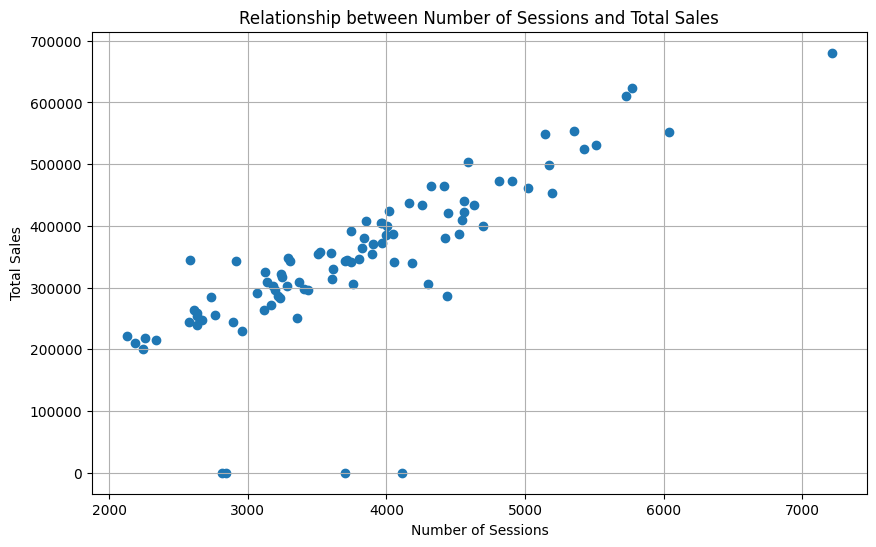

Test statistic and p-value: PearsonRResult(statistic=0.7910809164540893, pvalue=6.483532312080459e-21)
Pearson Correlation: 0.7910809164540887


In [ ]:
# Взаємозв’язок між кількістю сесій та загальним продажами за кожну дату

# Групування даних за датою та агрегація
daily_data = df.groupby('order_date').agg(num_sessions=('ga_session_id', 'nunique'), total_sales=('price', 'sum')).reset_index()
daily_data.head()

# Графік розсіювання (scatter plot) для візуалізації взаємозв'язку між метриками
plt.figure(figsize=(10, 6))
plt.scatter(daily_data['num_sessions'], daily_data['total_sales'])
plt.xlabel('Number of Sessions')
plt.ylabel('Total Sales')
plt.title('Relationship between Number of Sessions and Total Sales')
plt.grid(True)
plt.show()

# p-value - значення показує статистичну значущість кореляції
# коефіцієнт кореляції Пірсона (Pearson Correlation Coefficient) - вимірює лінійний зв’язок між двома кількісними змінними

# p-value
print(f"Test statistic and p-value: {pearsonr(daily_data['num_sessions'], daily_data['total_sales'])}")

# Pearson correlation
pearson_corr = daily_data['num_sessions'].corr(daily_data['total_sales'])
print(f"Pearson Correlation: {pearson_corr}")

Графік показує загальну тенденцію: розмір загальних продажів збільшується зі збільшенням розміру кількості сесій, хоча є деякі відхилення.

Оскільки p-value < 0.05, взаємозв'язок між кількістю сесій та загальними продажами є статистично значущим. За величиною коефіцієнта кореляції, приблизно 0.791, робимо висновок, що змінні мають сильний прямий зв'язок.

In [ ]:
# Кореляція продажів на різних континентах (топ-3 континенти)

# Визначення топ-3 континентів за загальними продажами
top_continents = df.groupby("continent")["price"].sum().nlargest(3).index.tolist()

# Фільтрація даних для топ-3 континентів
continent_sales = df[df["continent"].isin(top_continents)].groupby(["order_date", "continent"])["price"].sum().unstack()

# Обчислення кореляційної матриці
continent_corr = continent_sales.corr()
print(continent_corr)

# Обчислення коефіцієнтів кореляції та p-value
correlation_results = {}

for c1 in continent_sales.columns:
    for c2 in continent_sales.columns:
        if c1 < c2:  # Уникаємо дублювання пар
            corr_coef, p_value = pearsonr(continent_sales[c1], continent_sales[c2])
            correlation_results[f"{c1} - {c2}"] = (corr_coef, p_value)

# Виведення результатів
for pair, (corr, p) in correlation_results.items():
    significance = "Статистично значуща" if p < 0.05 else "Не значуща"
    print(f"Кореляція між {pair}: {corr: 2f}, p-value: {p:.5f}, ({significance})")

continent  Americas      Asia    Europe
continent                              
Americas   1.000000  0.792025  0.770586
Asia       0.792025  1.000000  0.768427
Europe     0.770586  0.768427  1.000000
Кореляція між Americas - Asia:  0.792025, p-value: 0.00000, (Статистично значуща)
Кореляція між Americas - Europe:  0.770586, p-value: 0.00000, (Статистично значуща)
Кореляція між Asia - Europe:  0.768427, p-value: 0.00000, (Статистично значуща)


Оскільки p-value < 0.05 (в усіх випадках), взаємозв'язки є статистично значущими.

За величиною коефіцієнтів кореляції (0.77–0.79), робимо висновок, що продажі на різних континентах мають сильний прямий взаємозв’язок, тобто зміни в продажах на одному континенті відображаються на інших.

In [ ]:
# Кореляція продажів за різними каналами трафіку

# Групування продажів за датами та каналами трафіку
traffic_sales = df.groupby(["order_date", "traffic_channel"])["price"].sum().unstack()

# Обчислення коефіцієнтів кореляції та p-значень
correlation_results = {}

for ch1 in traffic_sales.columns:
    for ch2 in traffic_sales.columns:
        if ch1 < ch2:  # Уникаємо дублювання пар
            corr_coef, p_value = pearsonr(traffic_sales[ch1], traffic_sales[ch2])
            correlation_results[f"{ch1} - {ch2}"] = (corr_coef, p_value)

# Виведення результатів
for pair, (corr, p) in correlation_results.items():
    significance = "Статистично значуща" if p < 0.05 else "Не значуща"
    print(f"Кореляція між {pair}: {corr:.2f}, p-value: {p:.5f}, ({significance})")

Кореляція між Direct - Organic Search: 0.84, p-value: 0.00000, (Статистично значуща)
Кореляція між Direct - Paid Search: 0.81, p-value: 0.00000, (Статистично значуща)
Кореляція між Direct - Social Search: 0.60, p-value: 0.00000, (Статистично значуща)
Кореляція між Direct - Undefined: 0.52, p-value: 0.00000, (Статистично значуща)
Кореляція між Organic Search - Paid Search: 0.87, p-value: 0.00000, (Статистично значуща)
Кореляція між Organic Search - Social Search: 0.58, p-value: 0.00000, (Статистично значуща)
Кореляція між Organic Search - Undefined: 0.53, p-value: 0.00000, (Статистично значуща)
Кореляція між Paid Search - Social Search: 0.60, p-value: 0.00000, (Статистично значуща)
Кореляція між Paid Search - Undefined: 0.52, p-value: 0.00000, (Статистично значуща)
Кореляція між Social Search - Undefined: 0.46, p-value: 0.00001, (Статистично значуща)


Оскільки p-value < 0.05 (в усіх випадках), взаємозв'язки є статистично значущими.

За величиною коефіцієнтів кореляції (0.46–0.87), робимо висновок, що продажі за різними каналами трафіку мають як сильний, так і помірний прямий зв'язок, а саме:
- сильний між Direct, Organic Search і Paid Search (0.81–0.87) свідчить про те, що ці канали працюють у тісному взаємозв’язку;
- помірний Social Search із іншими каналами (0.46–0.60) може означати, що соціальний трафік менш пов’язаний з іншими каналами;
- Undefined має найнижчі показники взаємозв'яку, тому що це може бути змішаний або некатегоризований трафік.

In [ ]:
# Кореляція продажів за категоріями товарів (топ-5)

# Визначення топ-5 категорій за загальними продажами
top_categories = df.groupby("category")["price"].sum().nlargest(5).index.tolist()

# Створення матриці продажів по категоріях товарів для кожного користувача
category_sales_matrix = df[df["category"].isin(top_categories)].pivot_table(
    values="price", index="user_id", columns="category", aggfunc="sum"
).fillna(0)

# Обчислення кореляційної матриці
category_corr = category_sales_matrix.corr()
print(category_corr)

# Обчислення коефіцієнтів кореляції та p-value
correlation_results = {}

for c1 in category_sales_matrix.columns:
    for c2 in category_sales_matrix.columns:
        if c1 < c2:  # Уникаємо дублювання пар
            corr_coef, p_value = pearsonr(category_sales_matrix[c1], category_sales_matrix[c2])
            correlation_results[f"{c1} - {c2}"] = (corr_coef, p_value)

# Виведення результатів
for pair, (corr, p) in correlation_results.items():
    significance = "Статистично значуща" if p < 0.05 else "Не значуща"
    print(f"Кореляція між {pair}: {corr:.2f}, p-value: {p:.5f}, ({significance})")

category                        Beds  Bookcases & shelving units  \
category                                                           
Beds                        1.000000                   -0.093743   
Bookcases & shelving units -0.093743                    1.000000   
Cabinets & cupboards       -0.060683                   -0.093904   
Chairs                     -0.080742                   -0.124943   
Sofas & armchairs          -0.073777                   -0.114165   

category                    Cabinets & cupboards    Chairs  Sofas & armchairs  
category                                                                       
Beds                                   -0.060683 -0.080742          -0.073777  
Bookcases & shelving units             -0.093904 -0.124943          -0.114165  
Cabinets & cupboards                    1.000000 -0.080881          -0.073904  
Chairs                                 -0.080881  1.000000          -0.098332  
Sofas & armchairs                      -0.0

Оскільки p-value < 0.05 (в усіх випадках), взаємозв'язки є статистично значущими, але вони слабкі (-0.12 до -0.06), що вказує на невеликий взаємозв’язок між продажами різних категорій.

Негативна кореляція означає, що коли збільшуються продажі однієї категорії, інша може трохи зменшуватися. Ймовірно, існує невеликий ефект конкуренції між категоріями (наприклад, люди вибирають між різними типами меблів).

In [ ]:
# Кореляція продажів за різними типами девайсів

# Групування даних за девайсами та обчислення загальних продажів
device_sales = df.groupby('device')['price'].sum()

# Отримання списку девайсів
devices = device_sales.index.tolist()

# Створення DataFrame для обчислення кореляції
device_sales_df = df.groupby(['order_date', 'device'])['price'].sum().unstack().fillna(0)

# Обчислення коефіцієнтів кореляції та p-значень
correlation_results = {}

for d1 in devices:
    for d2 in devices:
        if d1 < d2:  # Уникаємо дублювання пар
            corr_coef, p_value = pearsonr(device_sales_df[d1], device_sales_df[d2])
            correlation_results[f"{d1} - {d2}"] = (corr_coef, p_value)

# Виведення результатів
for pair, (corr, p) in correlation_results.items():
    significance = "Статистично значуща" if p < 0.05 else "Не значуща"
    print(f"Кореляція між {pair}: {corr:.3f}, p-value: {p:.3f}, ({significance})")

Кореляція між desktop - mobile: 0.873, p-value: 0.000, (Статистично значуща)
Кореляція між desktop - tablet: 0.601, p-value: 0.000, (Статистично значуща)
Кореляція між mobile - tablet: 0.567, p-value: 0.000, (Статистично значуща)


Оскільки p-value < 0.05 (в усіх випадках), взаємозв'язки є статистично значущими.

За величиною коефіцієнтів кореляції (0.56–0.87), робимо висновок, що продажі за різними  типами девайсів мають як сильний, так і помірний прямий зв'язок, а саме:
- сильнй між Desktop - Mobile (0.873), продажі на десктопах і мобільних пристроях змінюються синхронно;
- помірний між Desktop - Tablet (0.601), продажі на десктопах і планшетах також взаємопов’язані, але не настільки сильно, як з мобільними. Можливо, планшети використовуються трохи в іншому контексті (наприклад, більше для медіаспоживання, а не для покупок);
- помірний між Mobile - Tablet (0.567), схожа картина: мобільні пристрої та планшети мають певну схожість у використанні, але все ж вони працюють трохи незалежніше.

***Статистичний аналіз відмінностей (Statistical Analysis of Differences)***

---



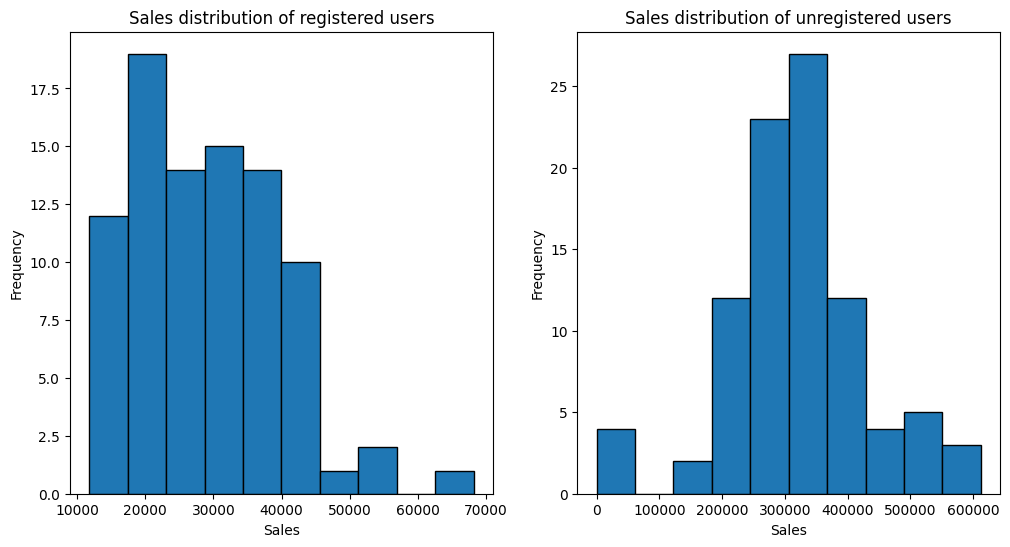

Описова статистика зареєстрованих користувачів:
 count       88.000000
mean     29346.801136
std      10765.451652
min      11779.000000
25%      20717.375000
50%      28048.000000
75%      35774.700000
max      68151.100000
Name: price, dtype: float64

Описова статистика незареєстрованих користувачів:
 count        92.000000
mean     319447.963043
std      113764.392969
min           0.000000
25%      263005.700000
50%      315170.750000
75%      375010.750000
max      612358.400000
Name: price, dtype: float64
p-value тесту Шапіро-Уілка для зареєстрованих: 0.007295139880540744
p-value тесту Шапіро-Уілка для незареєстрованих: 0.0012184604855253293
Використаний тест: Тест Манна-Уїтні
Статистика тесту: 352.0, p-value: 3.8805185465235906e-26
Існує статистично значуща різниця.


In [ ]:
# Аналіз продажів за кожну дату зареєстрованих та незареєстрованих користувачів
# Аналіз розподілу даних в обох вибірках
# Підбір відповідного статистичного тесту для порівняння вибірок

# Розділення користувачів на зареєстрованих та незареєстрованих
registered_users = df[df['user_id'].notna()]
unregistered_users = df[df['user_id'].isna()]

# Обчислення продажів за датами
registered_sales = registered_users.groupby('order_date')['price'].sum()
unregistered_sales = unregistered_users.groupby('order_date')['price'].sum()

# Аналіз розподілу даних
# Гістограми
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(registered_sales, bins=10, edgecolor='black')
plt.title('Sales distribution of registered users')
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
plt.hist(unregistered_sales, bins=10, edgecolor='black')
plt.title('Sales distribution of unregistered users')
plt.xlabel("Sales")
plt.ylabel("Frequency")

plt.show()

# Описова статистика
print('Описова статистика зареєстрованих користувачів:\n', registered_sales.describe())
print('\nОписова статистика незареєстрованих користувачів:\n', unregistered_sales.describe())

# Перевірка нормальності розподілу
stat_reg, p_reg = stats.shapiro(registered_sales)
stat_unreg, p_unreg = stats.shapiro(unregistered_sales)

print(f'p-value тесту Шапіро-Уілка для зареєстрованих: {p_reg}')
print(f'p-value тесту Шапіро-Уілка для незареєстрованих: {p_unreg}')

# Вибір статистичного тесту
if p_reg < 0.05 or p_unreg < 0.05:
    # Якщо дані не є нормальними, застосовуємо непараметричний тест Манна-Уїтні
    stat, p_value = stats.mannwhitneyu(registered_sales, unregistered_sales, alternative='two-sided')
    test_name = 'Тест Манна-Уїтні'
else:
    # Якщо розподіл нормальний, використовуємо t-тест
    stat, p_value = stats.ttest_ind(registered_sales, unregistered_sales, equal_var=False)
    test_name = 't-тест незалежних вибірок'

print(f'Використаний тест: {test_name}')
print(f'Статистика тесту: {stat}, p-value: {p_value}')

# Висновок щодо статистичної значущості
if p_value < 0.05:
    print('Існує статистично значуща різниця.')
else:
  print('Статистично значущих відмінностей не виявлено.')

Обидва розподіли продажів не є ні нормальними, ні рівномірними. Вони мають правосторонню асиметрію, що вказує на наявність невеликої кількості користувачів з дуже високими продажами.

Відмінності в продажах між зареєстрованими та незареєстрованими користувачами
є статистично значущими.

In [ ]:
# Аналіз кількості сесій за різними каналами трафіку

# Підрахунок кількості сесій за каналами трафіку
session_counts = df.groupby("traffic_channel")["ga_session_id"].count()
print("Кількість сесій за каналами трафіку:")
print(session_counts)

# Перевірка нормальності розподілу даних (тест Шапіро-Уілка)
stat, p_value_normality = stats.shapiro(session_counts)

# Вибір статистичного тесту
# Якщо дані мають нормальний розподіл, використовується ANOVA
if p_value_normality > 0.05:
    stat_test, p_value_test = stats.f_oneway(*[df[df["traffic_channel"] == channel]["ga_session_id"] for channel in df["traffic_channel"].unique()])
    test_type = "ANOVA"
# Якщо дані не мають нормального розподілу, використовується критерій Крускала-Уолліса
else:
    stat_test, p_value_test = stats.kruskal(*[df[df["traffic_channel"] == channel]["ga_session_id"] for channel in df["traffic_channel"].unique()])
    test_type = "Kruskal-Wallis"

# Вивід результатів
print(f"Використаний тест: {test_type}")
print(f"p-value: {p_value_test}")

if p_value_test < 0.05:
    print("Є статистично значущі відмінності між групами.")
else:
    print("Статистично значущих відмінностей між групами не виявлено.")

Кількість сесій за каналами трафіку:
traffic_channel
Direct             81382
Organic Search    124425
Paid Search        94341
Social Search      27914
Undefined          21483
Name: ga_session_id, dtype: Int64
Використаний тест: ANOVA
p-value: 0.22995860281947955
Статистично значущих відмінностей між групами не виявлено.


In [ ]:
# Статистичні відмінності частки сесій з органічним трафіком у Європі та Америці

import statsmodels.api as sm

# Фільтрація та підрахунок унікальних сесій, ігноруючи можливі NaN
total_sessions_europe = df[df['continent'] == 'Europe']['ga_session_id'].nunique()
organic_sessions_europe = df[(df['continent'] == 'Europe') & (df['traffic_source'] == 'organic')]['ga_session_id'].nunique()

total_sessions_americas = df[df['continent'] == 'Americas']['ga_session_id'].nunique()
organic_sessions_americas = df[(df['continent'] == 'Americas') & (df['traffic_source'] == 'organic')]['ga_session_id'].nunique()

# Обчислення пропорцій
prop_europe = organic_sessions_europe / total_sessions_europe
prop_americas = organic_sessions_americas / total_sessions_americas

# Виконання z-тесту для двох пропорцій
z_stat, p_value = sm.stats.proportions_ztest(
    [organic_sessions_europe, organic_sessions_americas],
    [total_sessions_europe, total_sessions_americas]
)

# Вивід результатів
print(f"Європа: {organic_sessions_europe}/{total_sessions_europe} ({prop_europe:.2%})")
print(f"Америка: {organic_sessions_americas}/{total_sessions_americas} ({prop_americas:.2%})")
print(f"Z-статистика: {z_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Є статистично значуща різниця між частками органічного трафіку в Європі та Америці.")
else:
    print("Статистично значущих відмінностей у частках органічного трафіку між Європою та Америкою не виявлено.")

Європа: 22190/65135 (34.07%)
Америка: 65783/193179 (34.05%)
Z-статистика: 0.06907726418476848
P-value: 0.9449281183430579
Статистично значущих відмінностей у частках органічного трафіку між Європою та Америкою не виявлено.


In [ ]:
# Статистичні відмінності продажів між користувачами, які підтвердили та не підтвердили свій email

from scipy.stats import mannwhitneyu

# Очищаємо дані від NaN
df_cleaned = df.dropna(subset=['price', 'is_email_verified'])

# Розділяємо дані на дві групи
verified_sales = df_cleaned[df_cleaned['is_email_verified'] == 'YES']['price']
unverified_sales = df_cleaned[df_cleaned['is_email_verified'] == 'NO']['price']

# Виконуємо U-тест Манна-Вітні
stat, p_value = mannwhitneyu(verified_sales, unverified_sales)

print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")

# Визначаємо, чи є статистично значущі відмінності
if p < 0.05:
    print("Є статистично значущі відмінності у продажах між користувачами, які підтвердили та не підтвердили свій email.")
else:
    print("Немає статистично значущих відмінностей у продажах між користувачами, які підтвердили та не підтвердили свій email.")

U-statistic: 30920347.0
P-value: 0.27711748323156726
Немає статистично значущих відмінностей у продажах між користувачами, які підтвердили та не підтвердили свій email.


In [ ]:
# Статистичні відмінності середньої ціни замовлення між користувачами з різних континентів

from scipy.stats import kruskal

# Очищаємо дані від NaN
df_cleaned = df.dropna(subset=['price', 'continent'])

# Групуємо дані за континентами
continent_groups = [group['price'] for _, group in df_cleaned.groupby('continent')]

# Виконуємо тест Крускала-Уолліса
stat, p_value = kruskal(*continent_groups)

print(f"Kruskal-Wallis statistic: {stat}")
print(f"P-value: {p_value}")

# Визначаємо, чи є статистично значущі відмінності
if p_value < 0.05:
    print("Є статистично значущі відмінності у середній ціні замовлення між користувачами з різних континентів.")
else:
    print("Немає статистично значущих відмінностей у середній ціні замовлення між користувачами з різних континентів.")

Kruskal-Wallis statistic: 3.2798842870433944
P-value: 0.6569227680484886
Немає статистично значущих відмінностей у середній ціні замовлення між користувачами з різних континентів.


***Посилання на дашборди в Tableau***

---

[Session Analytics Dashboard](https://public.tableau.com/app/profile/yurii.ivancha/viz/SessionAnalyticsDashboard/SessionAnalysis)

[Sales Overview](https://public.tableau.com/app/profile/yurii.ivancha/viz/SalesOverview_17421519632310/Sales)